In [24]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os

In [25]:
df = pd.read_csv('/Users/seren/OneDrive/Documents/GitHub/DAProject/catalog.csv')

In [26]:
df.columns

Index(['id', 'date', 'time', 'continent_code', 'country_name', 'country_code',
       'state/province', 'population', 'city/town', 'distance',
       'location_description', 'latitude', 'longitude', 'geolocation',
       'hazard_type', 'landslide_type', 'landslide_size', 'trigger',
       'storm_name', 'injuries', 'fatalities', 'source_name', 'source_link'],
      dtype='object')

# Data Cleaning

### Heatmap to detect null values

id                      1693
date                     922
time                     159
continent_code             1
country_name              28
country_code              28
state/province           226
population              1000
city/town               1034
distance                1675
location_description      12
latitude                1665
longitude               1665
geolocation             1678
hazard_type                1
landslide_type            14
landslide_size             7
trigger                   16
storm_name                49
injuries                  15
fatalities                36
source_name              552
source_link             1325
dtype: int64


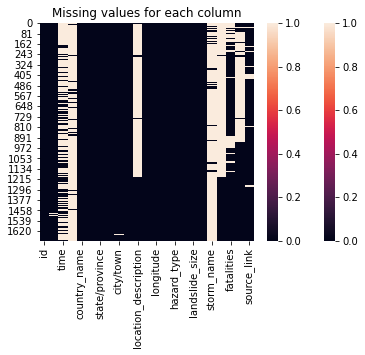

In [27]:
sns.heatmap(df.isnull())
print(df.nunique(axis=0));
plt.title("Missing values for each column")
sns.heatmap(df.isnull())
plt.show()

In [28]:
# Drop continent code
df.drop(['continent_code'], axis=1, inplace=True)

In [29]:
# Cleaning trigger column
df.trigger.replace(['unknown'],'Unknown', inplace=True)
df.trigger.replace(['Other'],'Unknown', inplace=True)
df.trigger.replace(['downpour'],'Downpour', inplace=True)
df.trigger = df.trigger.fillna('Unknown')
df.head

<bound method NDFrame.head of         id     date   time   country_name country_code  state/province  \
0       34   3/2/07  Night  United States           US        Virginia   
1       42  3/22/07    NaN  United States           US            Ohio   
2       56   4/6/07    NaN  United States           US    Pennsylvania   
3       59  4/14/07    NaN         Canada           CA          Quebec   
4       61  4/15/07    NaN  United States           US        Kentucky   
...    ...      ...    ...            ...          ...             ...   
1688  7535  12/7/15    NaN  United States           US  North Carolina   
1689  7537  2/22/16   0:00  United States           US   West Virginia   
1690  7539  2/23/16    NaN  United States           US   West Virginia   
1691  7540  2/26/16  21:06  United States           US   West Virginia   
1692  7541   3/2/16   8:00  United States           US         Vermont   

      population         city/town  distance location_description  ...  \
0      

In [30]:
# Cleaning location description column
df.location_description.replace(['Other'],'Unknown', inplace=True)
df.location_description = df.location_description.fillna('Unknown')

In [31]:
# Cleaning time column
df.time.replace(['evening'],'Evening', inplace=True)
df.time = df.time.fillna('Unknown')

In [32]:
# Cleaning landslide type column
df.landslide_type.replace(['landslide'],'Landslide', inplace=True)
df.landslide_type.replace(['mudslide'],'Mudslide', inplace=True)
df.landslide_type.replace(['Unknown'],'Other', inplace=True)
df.landslide_type = df.landslide_type.fillna('Other')

In [33]:
# Cleaning landslide size column
df.landslide_size.replace(['large'],'Large', inplace=True)
df.landslide_type.replace(['medium'],'Medium', inplace=True)
df.landslide_type.replace(['small'],'Small', inplace=True)

In [34]:
# Cleaning source name and source type type column
df.source_name = df.source_name.fillna('Unknown')
df.source_link = df.source_link.fillna('Unknown')

In [35]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1693 entries, 0 to 1692
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1693 non-null   int64  
 1   date                  1690 non-null   object 
 2   time                  1693 non-null   object 
 3   country_name          1693 non-null   object 
 4   country_code          1693 non-null   object 
 5   state/province        1692 non-null   object 
 6   population            1693 non-null   int64  
 7   city/town             1689 non-null   object 
 8   distance              1692 non-null   float64
 9   location_description  1693 non-null   object 
 10  latitude              1692 non-null   float64
 11  longitude             1692 non-null   float64
 12  geolocation           1692 non-null   object 
 13  hazard_type           1693 non-null   object 
 14  landslide_type        1693 non-null   object 
 15  landslide_size       

,id,date,time,country_name,country_code,state/province,population,city/town,distance,location_description,...,geolocation,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link
0,34,3/2/07,Night,United States,US,Virginia,16000,Cherry Hill,3.40765,Unknown,...,"(38.600900000000003, -77.268199999999993)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html
1,42,3/22/07,Unknown,United States,US,Ohio,17288,New Philadelphia,3.33522,Unknown,...,"(40.517499999999998, -81.430499999999995)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...
2,56,4/6/07,Unknown,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,Urban area,...,"(40.4377, -79.915999999999997)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...
3,59,4/14/07,Unknown,Canada,CA,Quebec,42786,Châteauguay,2.98682,Above river,...,"(45.322600000000001, -73.777100000000004)",Landslide,Riverbank collapse,Small,Rain,NaN,NaN,NaN,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...
4,61,4/15/07,Unknown,United States,US,Kentucky,6903,Pikeville,5.66542,Below road,...,"(37.432499999999997, -82.493099999999998)",Landslide,Landslide,Small,Downpour,NaN,NaN,0.0,Matthew Crawford (KGS),Unknown


### Parsing Dates

In [36]:
print(df['date'].head())
df.dropna(subset = ['date'], inplace=True)
df.reset_index(drop=True, inplace=True)

0     3/2/07
1    3/22/07
2     4/6/07
3    4/14/07
4    4/15/07
Name: date, dtype: object


In [37]:
# Create a new column, date_parsed, with the parsed dates
df['date_parsed'] = pd.to_datetime(df['date'], format="%m/%d/%y")

In [38]:
print(df['date_parsed'].head())

0   2007-03-02
1   2007-03-22
2   2007-04-06
3   2007-04-14
4   2007-04-15
Name: date_parsed, dtype: datetime64[ns]


In [39]:
# Add year and month colums
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month

In [40]:
# Add abbreviated months
myMonths = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
df['MonthAbb'] = df['month']
for i in range(len(df['month'])):
    df['MonthAbb'][i] = myMonths[int(df['month'][i]-1)]

<ipython-input-40-f37524211a53>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\seren\AppData\Roaming\Python\Python38\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [42]:
df['month_landslides'] = df['date_parsed'].dt.month
df.month_landslides.head()

0    3
1    3
2    4
3    4
4    4
Name: month_landslides, dtype: int64

In [43]:
date_landslides = df['date_parsed'].dt.day
date_landslides.head()

0     2
1    22
2     6
3    14
4    15
Name: date_parsed, dtype: int64

In [44]:
df["year"]=year_landslides = df['date_parsed'].dt.year
year_landslides = df['date_parsed'].dt.year
year_landslides.head()

0    2007
1    2007
2    2007
3    2007
4    2007
Name: date_parsed, dtype: int64

In [45]:
grouped_df = df.groupby(["month_landslides", "year"])
grouped_df.head()

,id,date,time,country_name,country_code,state/province,population,city/town,distance,location_description,...,storm_name,injuries,fatalities,source_name,source_link,date_parsed,year,month,MonthAbb,month_landslides
0,34,3/2/07,Night,United States,US,Virginia,16000,Cherry Hill,3.40765,Unknown,...,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html,2007-03-02,2007,3,March,3
1,42,3/22/07,Unknown,United States,US,Ohio,17288,New Philadelphia,3.33522,Unknown,...,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...,2007-03-22,2007,3,March,3
2,56,4/6/07,Unknown,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,Urban area,...,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...,2007-04-06,2007,4,April,4
3,59,4/14/07,Unknown,Canada,CA,Quebec,42786,Châteauguay,2.98682,Above river,...,NaN,NaN,NaN,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...,2007-04-14,2007,4,April,4
4,61,4/15/07,Unknown,United States,US,Kentucky,6903,Pikeville,5.66542,Below road,...,NaN,NaN,0.0,Matthew Crawford (KGS),Unknown,2007-04-15,2007,4,April,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1672,7520,2/24/16,Night,United States,US,Pennsylvania,5951,Crafton,1.45894,Above road,...,NaN,0.0,0.0,WPXI,http://www.wpxi.com/news/news/local/rockslide-...,2016-02-24,2016,2,February,2
1673,7521,2/15/16,Morning,United States,US,Colorado,9614,Glenwood Springs,13.85194,Above road,...,NaN,0.0,0.0,CBS,http://denver.cbslocal.com/2016/02/16/i-70-clo...,2016-02-15,2016,2,February,2
1674,7522,2/24/16,Unknown,United States,US,Virginia,1128,Pembroke,3.21144,Above road,...,NaN,0.0,0.0,NEWSSHINE,http://www.newsshine.com/us-local-news/virgini...,2016-02-24,2016,2,February,2
1677,7527,1/28/16,9:45,United States,US,North Carolina,1241,Blowing Rock,4.20387,Above road,...,NaN,0.0,0.0,WSOC,http://www.wsoctv.com/news/rock-slide-shuts-do...,2016-01-28,2016,1,January,1


In [46]:
count=grouped_df.id.nunique()
count.head(15)

month_landslides  year
1                 2008     5
                  2009     2
                  2010    16
                  2011     8
                  2012     4
                  2013    15
                  2014     9
                  2015     4
                  2016     2
2                 2008     3
                  2009     1
                  2010    14
                  2011     6
                  2012     1
                  2013     1
Name: id, dtype: int64

# Data Visualization

### What size of landslides are most likely to occur

Text(0.5, 1.0, 'Lanslide Size Occurence')

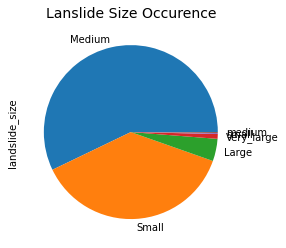

In [47]:
df.landslide_size.value_counts().plot(kind='pie')
plt.title('Lanslide Size Occurence', fontsize=14)

#### Inference:
From the above chart we can infer that medium sized landslides are most likely to occur and very large landslides are least likely to occur.

### Occurrence of different types of triggers of landslides 

Text(0.5, 1.0, 'Occurrence of different types of triggers')

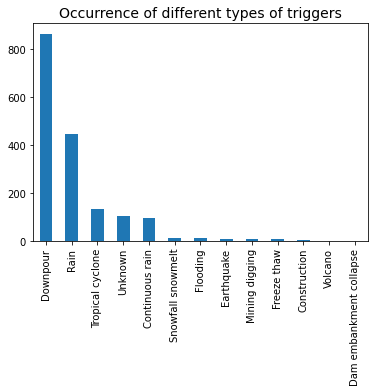

In [48]:
df.trigger.value_counts().plot(kind='bar')
plt.title('Occurrence of different types of triggers', fontsize=14)

#### Infrence:
From the above plot we can infer that landslides are most likely to be caused by downpour followed by rain, and it is least likely to be caused by a volcano and embarkment collapse.

### Number of fatalities and injuries that occurred vs the distance travelled by the landslide

Text(0.5, 1.0, 'Fatalities vs Distance travelled by landslide')

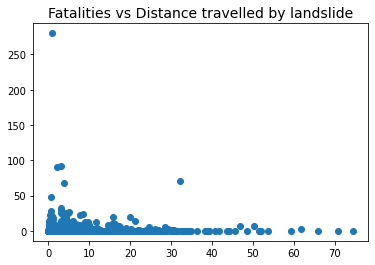

In [49]:
plt.title
plt.scatter(x = df['distance'], y = df['fatalities'])
plt.title('Fatalities vs Distance travelled by landslide', fontsize=14)

Text(0.5, 1.0, 'Injuries vs Distance travelled by the landslide')

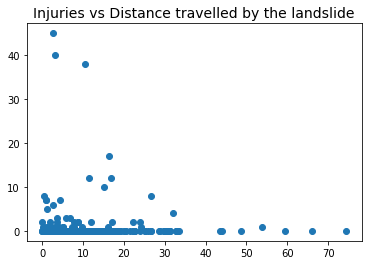

In [50]:
plt.scatter(x = df['distance'], y = df['injuries'])
plt.title('Injuries vs Distance travelled by the landslide', fontsize=14)

#### Inference:
From the above plots we can infer that landslides that happen over a shorter distance are more fatal and injurious than the ones that have been recorded over longer distances.

### Distribution of landslide per type and country

<AxesSubplot:title={'center':'Distribution of landslides per type and country'}, xlabel='country_name'>

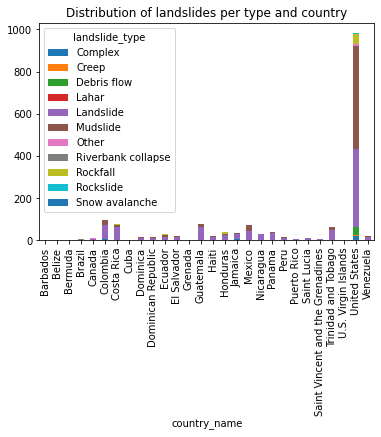

In [51]:
df.groupby(['country_name', 'landslide_type']).size().unstack().plot(kind='bar', stacked=True, title = 'Distribution of landslides per type and country')

#### Inference:
From the above plot we can infer:
* Landslides most commonly occur in the United States.
* Landslides and mudslides are the types of landslides that are most likely to occur. 


### Distribution of landslide type

<AxesSubplot:title={'center':'Distribution of landslide type'}>

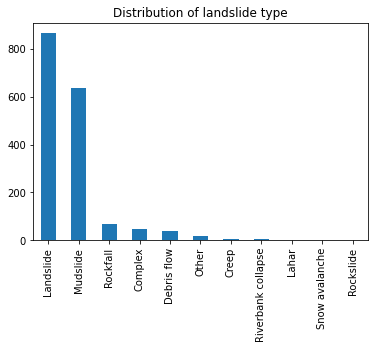

In [52]:
df.landslide_type.value_counts().plot(kind='bar', title = 'Distribution of landslide type')

#### Inference:
From the above plot we can infer that landslides are the most common type of landslide to occur followed by mudslides.

### Distribution of landslides per trigger per year

<AxesSubplot:title={'center':'Lanslide Trigger Trend'}, xlabel='year', ylabel='id'>

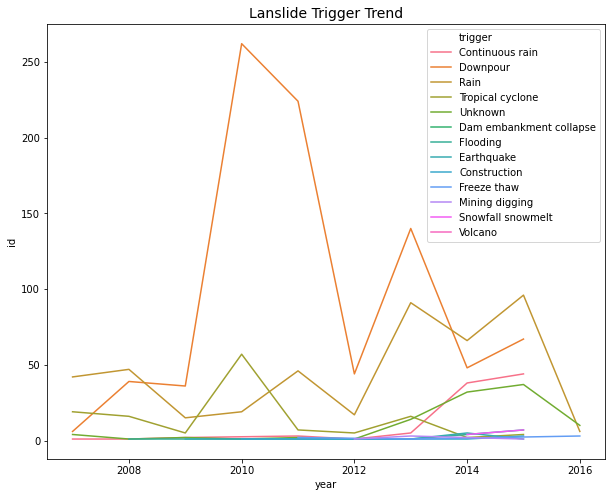

In [53]:
df_sort =  df.sort_values(by=['year'])  # sort by year
plt.figure(figsize=(10,8))
plt.title('Lanslide Trigger Trend', fontsize=14)
grouped = df_sort.groupby(['year', 'trigger']).count().reset_index()
sns.lineplot(data = grouped, x = 'year', y = 'id', hue = 'trigger')

#### Inference
From the above plot we can infer that landslides are most commonly triggered by downpour followed by rain.

### To check if there is a seasonality of occurrence of landslides

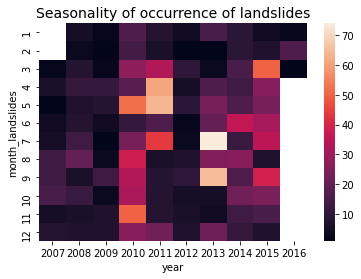

In [54]:
jb_count = count.loc[:,:].reset_index().pivot(index='month_landslides', columns='year', values='id')
sns.heatmap(jb_count)
plt.title('Seasonality of occurrence of landslides', fontsize=14)
plt.show()

#### Inference
There is no clear seasonality that can be visualized in the heatmap. However, in the boxplots there is a seasonality where in the beginning and end of the year there are less landslides than during the mid of the year.

In [ ]:
# To analyze the region of occurrences of various types of landslides and the number of fatalities they caused
